In [1]:
#Load Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
import tensorflow.contrib.learn.python.learn as learn
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

C:\Users\tesr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load Data

In [3]:
ccancer = pd.read_csv('risk_factors_cervical_cancer.csv')
#dataset found here:
#https://archive.ics.uci.edu/ml/machine-learning-databases/00383/

In [4]:
ccancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Principal Component Analysis (PCA) to determine if there might be a clear split to the binary classification

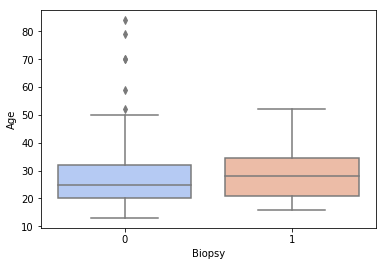

In [36]:
sns.boxplot(x="Biopsy", y="Age", data=ccancer, palette="coolwarm")

In [7]:
scaler = StandardScaler()
scaler.fit(ccancer)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_data = scaler.transform(ccancer)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

Text(0,0.5,'Second Principal Component')

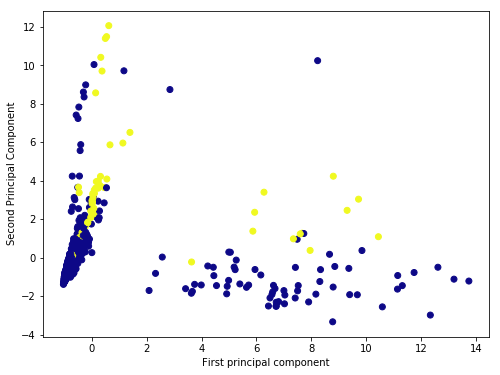

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=ccancer['Biopsy'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [10]:
#It appears there is some distiction, but not a clear-cut classification

In [11]:
#Apply train/test/split to the dataset

In [12]:
X = ccancer.iloc[:,0:34]
y = ccancer.iloc[:,35:36]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
classifier = learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3)#,feature_columns=feature_columns)
classifier.fit(X_train, y_train, steps=200, batch_size=32)

NameError: name 'learn' is not defined

In [14]:
ccancer_predictions = classifier.predict(X_test)

NameError: name 'classifier' is not defined

In [15]:
print(classification_report(y_test,ccancer_predictions))

NameError: name 'ccancer_predictions' is not defined

In [16]:
#Let's see if we can get better results with a Random Forest

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

C:\Users\tesr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,rfc_pred))

[[233   7]
 [  8  10]]


In [23]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       240
          1       0.59      0.56      0.57        18

avg / total       0.94      0.94      0.94       258

